<a href="https://colab.research.google.com/github/siddhartha-sai-17/Data-visualisation/blob/main/Amazon_products_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("amazon_products_dataset.csv")

# Display first and last 5 rows
print("First 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())

# Dataset shape and info
print("\nShape:", df.shape)
print("\nInfo:")
print(df.info())

# List of unique product categories
print("\nUnique categories:")
print(df['category'].unique())

# Identify columns needing cleaning or type conversion
print("\nColumns summary:")
print(df.describe(include='all'))


Saving amazon_products_dataset.csv to amazon_products_dataset (2).csv
First 5 rows:
                     title    brand    category  actual_price  discount_price  \
0      Smart Fitness Watch     Dell      Laptop       69890.0         65271.0   
1  Laptop with SSD Storage       LG  Smartwatch       66771.0         63977.0   
2  High Resolution Monitor       Mi  Headphones       43598.0         39679.0   
3         4K Action Camera       HP      Camera       63408.0         58877.0   
4      Smart Fitness Watch  Samsung     Monitor       49224.0         45017.0   

   rating  rating_count  
0     2.6        2128.0  
1     2.5        9118.0  
2     1.9        2517.0  
3     3.7       17533.0  
4     4.9       14228.0  

Last 5 rows:
                               title    brand    category  actual_price  \
1995  Smartphone with AMOLED Display     Dell     Monitor       24140.0   
1996             Smart Fitness Watch       LG  Headphones       65449.0   
1997                4K Action Came

In [ ]:
# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Fill missing numeric values with mean (or median if skewed)
numeric_cols = ['actual_price', 'discount_price', 'rating', 'rating_count']
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill missing categorical values with "Unknown"
categorical_cols = ['brand', 'category']
for col in categorical_cols:
    df[col].fillna('Unknown', inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Ensure numeric columns have correct type
df['actual_price'] = df['actual_price'].astype(float)
df['discount_price'] = df['discount_price'].astype(float)
df['rating'] = df['rating'].astype(float)
df['rating_count'] = df['rating_count'].astype(int)

# Reset index
df.reset_index(drop=True, inplace=True)



Missing values per column:
title             0
brand             0
category          2
actual_price      2
discount_price    1
rating            4
rating_count      4
dtype: int64


/tmp/ipython-input-1256401841.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-1256401841.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
# Top 5 most expensive products
top_expensive = df.nlargest(5, 'actual_price')
print("\nTop 5 expensive products:\n", top_expensive)

# Brand with highest number of products
top_brand = df['brand'].value_counts().idxmax()
print("\nBrand with most products:", top_brand)

# Average discount percentage per brand
df['discount_percent'] = ((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100
brand_avg_discount = df.groupby('brand')['discount_percent'].mean().reset_index()
print("\nAverage discount per brand:\n", brand_avg_discount)

# Products with rating >= 4.5 and rating_count >= 2000
high_rating_products = df[(df['rating'] >= 4.5) & (df['rating_count'] >= 2000)]
print("\nHigh rating & popular products:\n", high_rating_products)

# Category-wise average price
category_avg_price = df.groupby('category')['actual_price'].mean().reset_index()
category_avg_price.rename(columns={'actual_price': 'average_price'}, inplace=True)
print("\nCategory-wise average price:\n", category_avg_price)



Top 5 expensive products:
                  title  brand    category  actual_price  discount_price  \
1383    Android Tablet    JBL      Laptop       79993.0         78094.0   
1974     Gaming Laptop     LG     Monitor       79869.0         77173.0   
1403  4K Action Camera   Sony  Headphones       79857.0         77469.0   
1351    Android Tablet   Sony     Monitor       79853.0         78831.0   
42       Gaming Laptop  Apple  Smartwatch       79826.0         76919.0   

      rating  rating_count  
1383     3.0          7666  
1974     2.6          5232  
1403     2.7          1379  
1351     4.8          7596  
42       3.8         10252  

Brand with most products: Boat

Average discount per brand:
      brand  discount_percent
0    Apple         12.721996
1     Boat         12.546502
2     Dell         11.165004
3       HP         11.501202
4      JBL         11.370137
5       LG         11.968799
6       Mi         10.162308
7  OnePlus         11.380987
8  Samsung          9.30

In [ ]:
import numpy as np

# Discount percent (already calculated)
df['discount_percent'] = ((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100

# Price category
def price_category(price):
    if price < 500:
        return 'Budget'
    elif 500 <= price < 2000:
        return 'Midrange'
    else:
        return 'Premium'

df['price_category'] = df['actual_price'].apply(price_category)

# Popularity score
df['popularity_score'] = df['rating'] * np.log(df['rating_count'] + 1)


In [ ]:
# Top 10 highest popularity_score products
top_popular = df.nlargest(10, 'popularity_score')
print("\nTop 10 popular products:\n", top_popular)

# Premium items with discount > 40%
premium_discount = df[(df['price_category']=='Premium') & (df['discount_percent']>40)]
print("\nPremium products with >40% discount:\n", premium_discount)

# Products with "Bluetooth" in title
bluetooth_products = df[df['title'].str.contains('Bluetooth', case=False, na=False)]
print("\nProducts containing 'Bluetooth':\n", bluetooth_products)

# Products with rating >=4, discount 20-50%, popularity_score top 30%
pop_threshold = df['popularity_score'].quantile(0.7)
filtered_products = df[
    (df['rating']>=4.0) &
    (df['discount_percent'].between(20,50)) &
    (df['popularity_score']>=pop_threshold)
]
print("\nFiltered products:\n", filtered_products)



Top 10 popular products:
                                title    brand    category  actual_price  \
1418  Smartphone with AMOLED Display  OnePlus      Laptop       22786.0   
297       Portable Bluetooth Speaker  Samsung      Camera       52713.0   
502    Wireless Bluetooth Headphones  Samsung      Camera       17858.0   
1400         High Resolution Monitor     Dell  Headphones       11025.0   
878          Laptop with SSD Storage    Apple  Smartwatch        4436.0   
1489         High Resolution Monitor    Apple      Laptop       21711.0   
848          High Resolution Monitor       HP  Smartphone       11660.0   
854       Portable Bluetooth Speaker  Samsung  Smartwatch       19284.0   
1625                   Gaming Laptop     Dell      Tablet       15099.0   
637                 4K Action Camera     Dell  Headphones       35058.0   

      discount_price  rating  rating_count  discount_percent price_category  \
1418         22301.0     5.0         18510          2.128500        

In [ ]:
# Average discount percent per brand
avg_discount_brand = df.groupby('brand')['discount_percent'].mean().reset_index()
print("\nAverage discount per brand:\n", avg_discount_brand)

# Average popularity score per price_category
avg_popularity_category = df.groupby('price_category')['popularity_score'].mean().reset_index()
print("\nAverage popularity score per price category:\n", avg_popularity_category)

# Category with highest average discount
highest_discount_category = df.groupby('category')['discount_percent'].mean().idxmax()
print("\nCategory with highest average discount:", highest_discount_category)

# Total revenue potential per brand
df['revenue_potential'] = df['actual_price'] * df['rating_count']
revenue_brand = df.groupby('brand')['revenue_potential'].sum().reset_index()
print("\nRevenue potential per brand:\n", revenue_brand)



Average discount per brand:
      brand  discount_percent
0    Apple         12.721996
1     Boat         12.546502
2     Dell         11.165004
3       HP         11.501202
4      JBL         11.370137
5       LG         11.968799
6       Mi         10.162308
7  OnePlus         11.380987
8  Samsung          9.302573
9     Sony         10.388873

Average popularity score per price category:
   price_category  popularity_score
0         Budget         38.147220
1       Midrange         23.660324
2        Premium         26.366914

Category with highest average discount: Headphones

Revenue potential per brand:
      brand  revenue_potential
0    Apple       6.706081e+10
1     Boat       7.744870e+10
2     Dell       7.549826e+10
3       HP       8.297444e+10
4      JBL       7.723438e+10
5       LG       8.158487e+10
6       Mi       7.698029e+10
7  OnePlus       8.247380e+10
8  Samsung       8.117230e+10
9     Sony       7.930446e+10


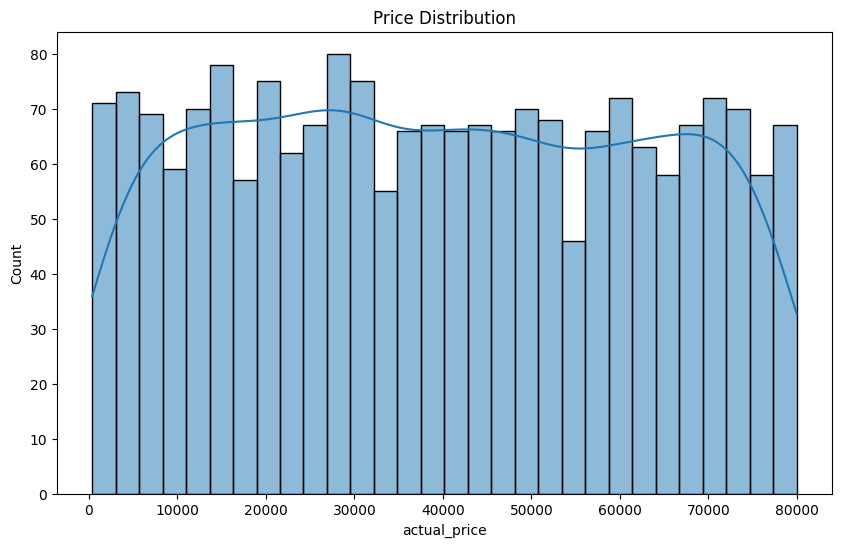

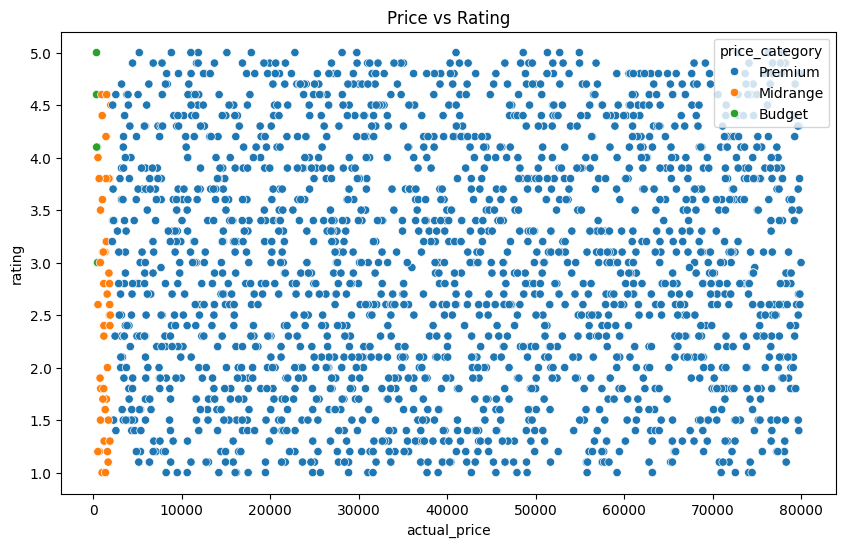

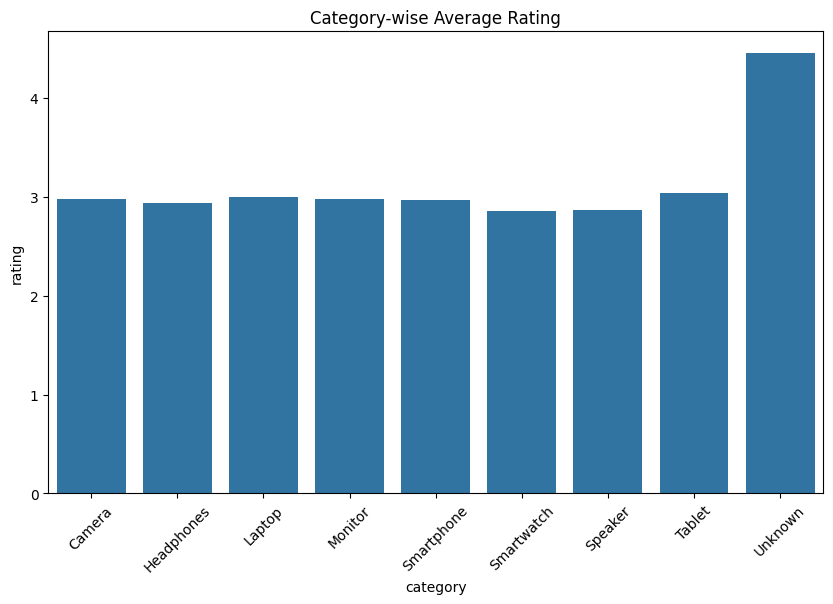

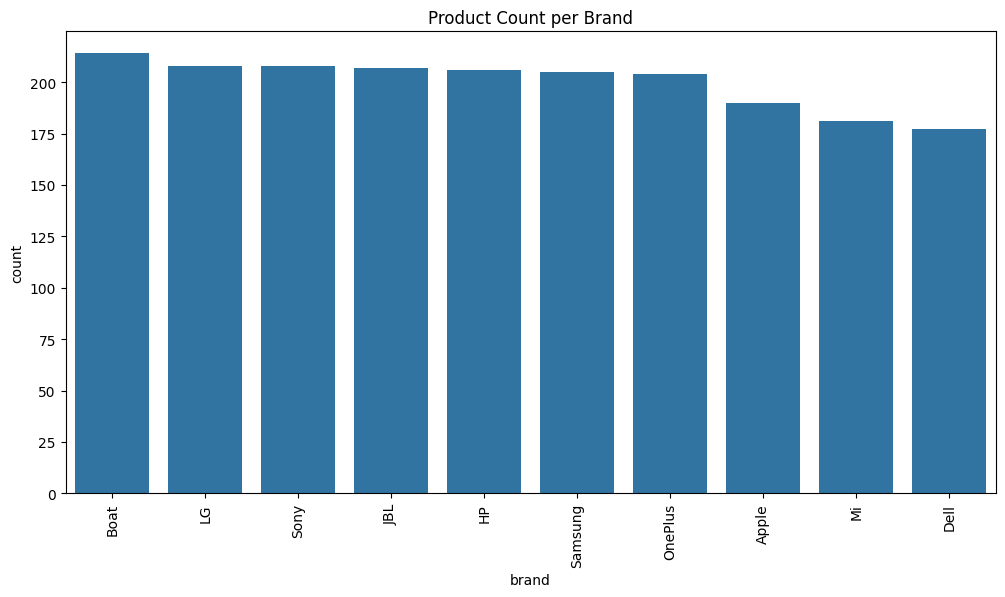

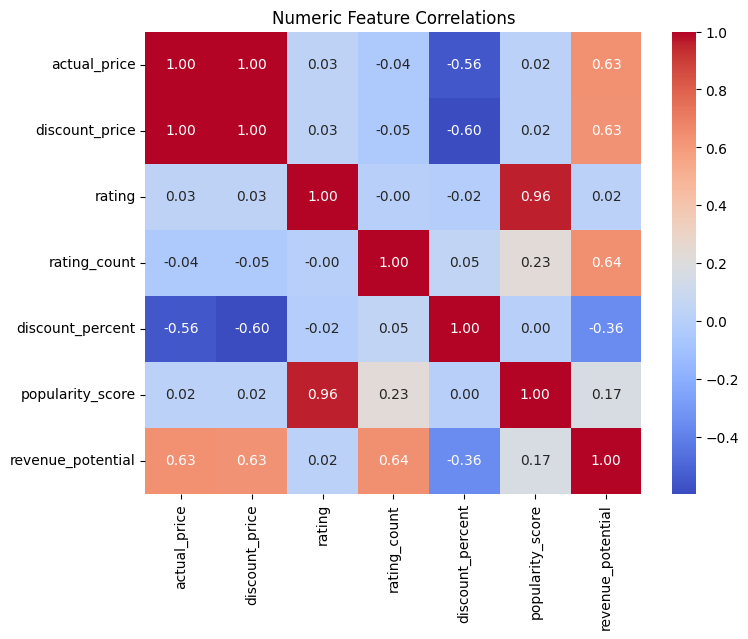

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price distribution → Histogram + KDE
plt.figure(figsize=(10,6))
sns.histplot(df['actual_price'], kde=True, bins=30)
plt.title('Price Distribution')
plt.show()

# Price vs Rating → Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='actual_price', y='rating', hue='price_category')
plt.title('Price vs Rating')
plt.show()

# Category-wise average rating → Bar plot
category_avg_rating = df.groupby('category')['rating'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=category_avg_rating, x='category', y='rating')
plt.xticks(rotation=45)
plt.title('Category-wise Average Rating')
plt.show()

# Brand product count → Count plot
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='brand', order=df['brand'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Product Count per Brand')
plt.show()

# Numeric feature correlations → Heatmap
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Numeric Feature Correlations')
plt.show()

